In [499]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

In [500]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\train.csv")

In [501]:
df = pd.DataFrame(df)

In [502]:
df.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [503]:
df.shape

(1235, 29)

In [504]:
df.hospital_number.nunique()

255

In [505]:
df.outcome.value_counts().keys().tolist()

['lived', 'died', 'euthanized']

In [506]:
df.outcome.value_counts(normalize=True)

outcome
lived         0.464777
died          0.331984
euthanized    0.203239
Name: proportion, dtype: float64

In [507]:
df = df.drop(["hospital_number","id"], axis=1)

In [508]:
outcome = {
    "died": -1,
    "euthanized": 0,
    "lived": 1
}
df.outcome = df.outcome.map(outcome)

In [509]:
df.outcome

0      -1
1       0
2       1
3       1
4       1
       ..
1230    1
1231   -1
1232    1
1233    1
1234    1
Name: outcome, Length: 1235, dtype: int64

In [510]:
numeric = []
binary = []
categoric = []
for i in df.columns:
    if df[i].dtypes == "int64" and df[i].nunique() == 2 or df[i].dtypes == "float64" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "object" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(i)
    else: 
        categoric.append(i)

In [511]:
numeric = pd.DataFrame(df[numeric])
categoric = pd.DataFrame(df[categoric])
binary = pd.DataFrame(df[binary])

In [512]:
numeric.isnull().sum()

rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
outcome                  0
dtype: int64

In [513]:
categoric.isnull().sum()

temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
rectal_exam_feces        190
abdomen                  213
abdomo_appearance         48
dtype: int64

In [514]:
for i in categoric.columns:
    categoric[i] = categoric[i].fillna(categoric[i].mode()[0])

In [515]:
categoric.isnull().sum()

temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
dtype: int64

In [516]:
binary.isnull().sum()

surgery            0
age                0
surgical_lesion    0
lesion_3           0
cp_data            0
dtype: int64

In [517]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance
0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious
1,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious
2,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,absent,distend_large,serosanguious
3,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy
4,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,absent,distend_large,serosanguious
1231,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious
1232,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy
1233,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy


In [518]:
categoric.peristalsis.unique()

array(['absent', 'hypomotile', 'normal', 'hypermotile', 'distend_small'],
      dtype=object)

In [519]:
peris = {
    "normal": 1,
    "absent": 0,
    "hypomotile": 2,
    "hypermotile": 4, 
    "distend_small": 3
}
categoric.peristalsis = categoric.peristalsis.map(peris)


In [520]:
numeric = pd.concat([numeric, categoric["peristalsis"]], axis=1)
categoric = categoric.drop("peristalsis", axis=1)

<Axes: >

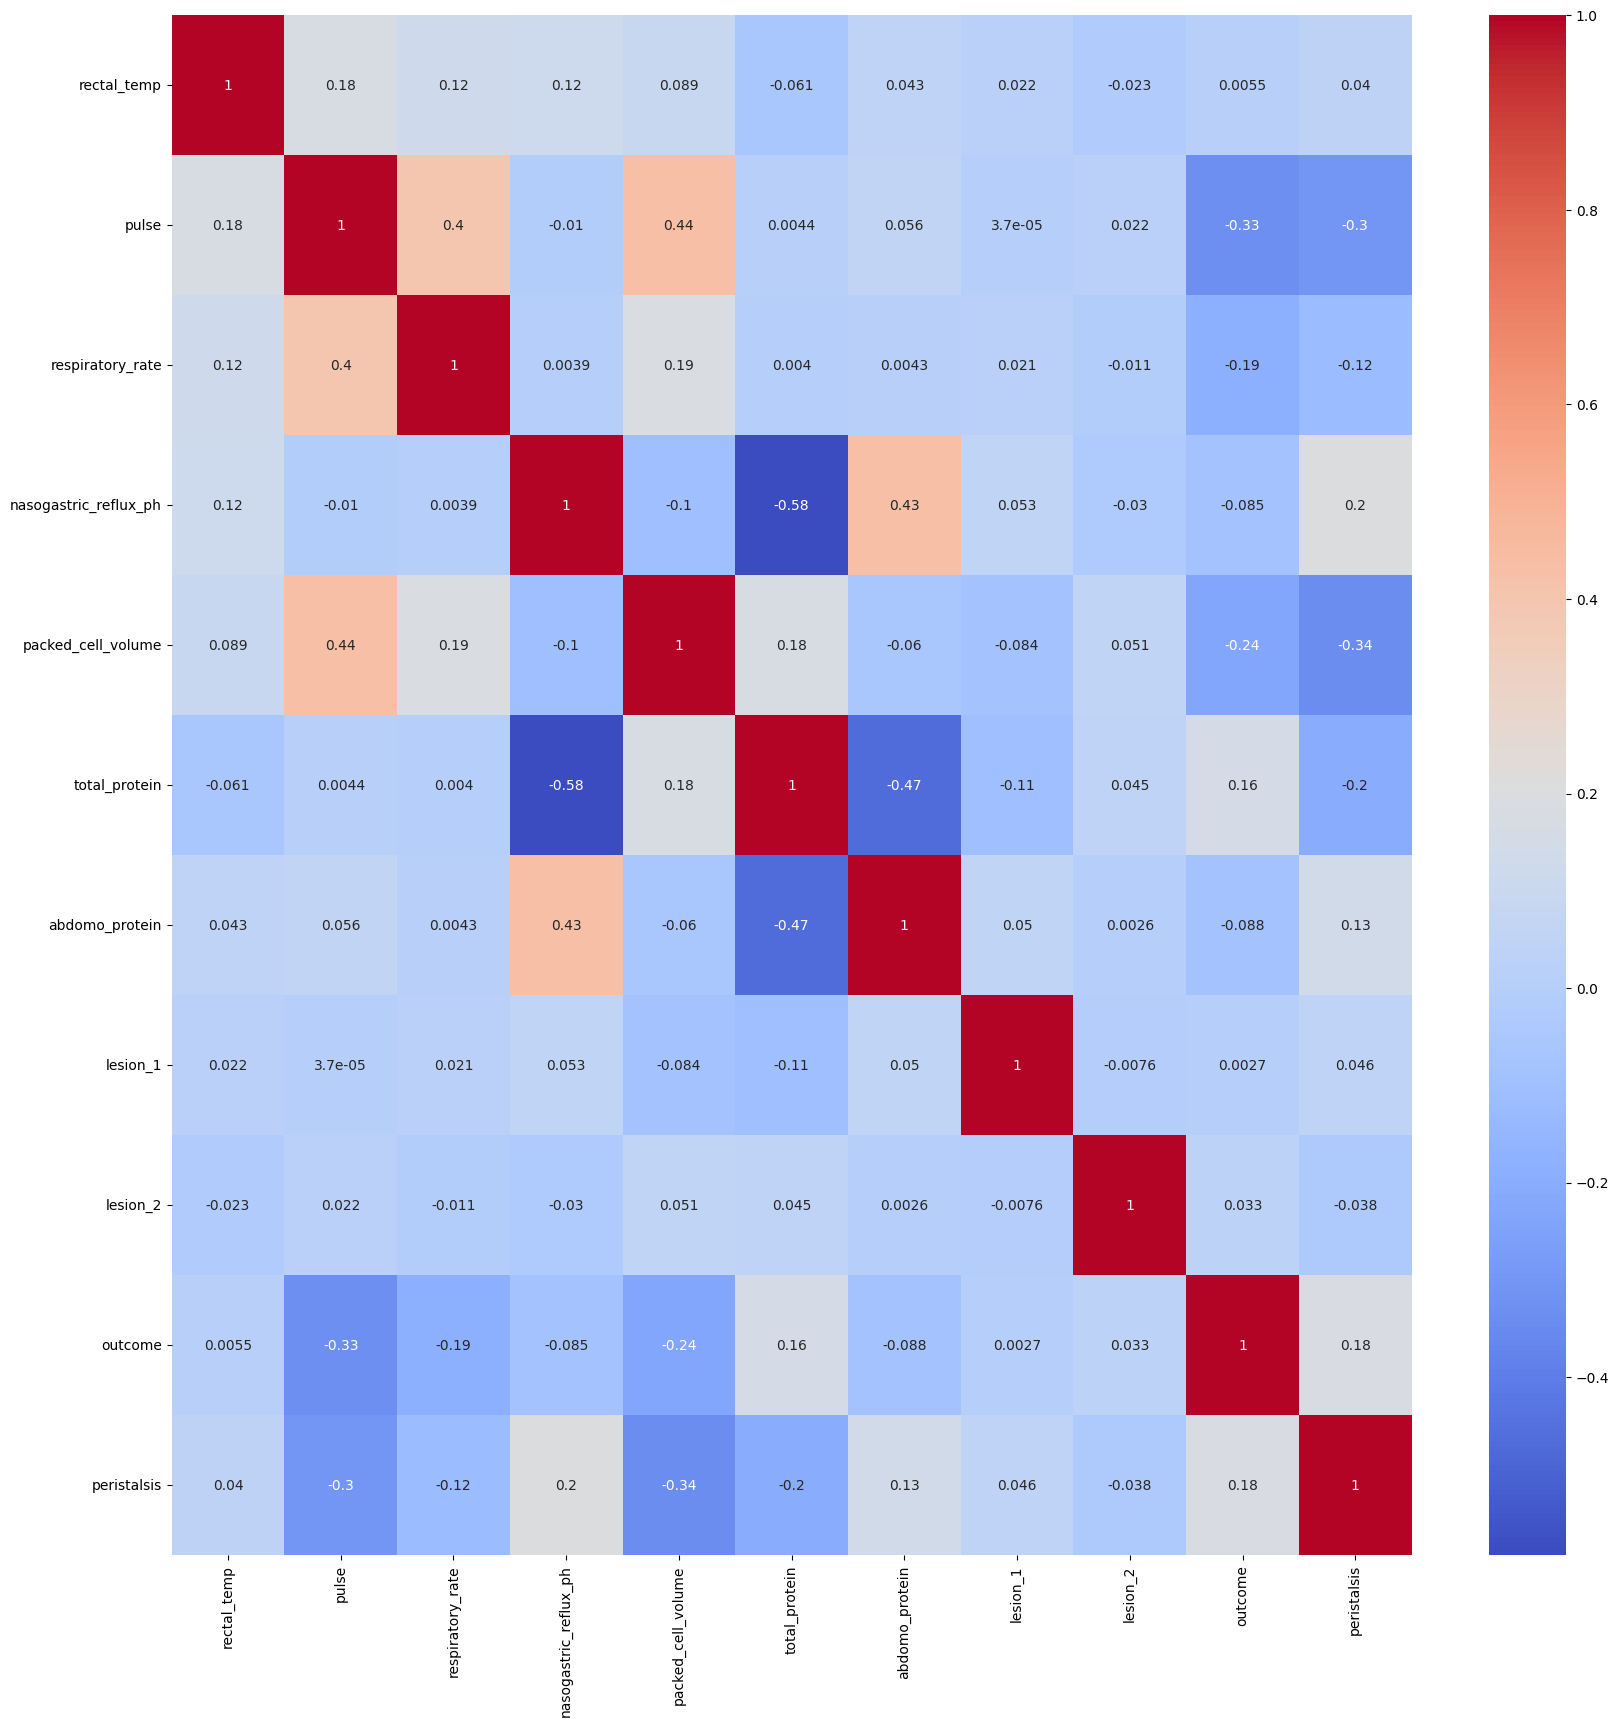

In [521]:
corr = numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [522]:
if numeric["nasogastric_reflux_ph"].std() > numeric["total_protein"].std():
    numeric.drop("total_protein", axis=1, inplace=True)
else:
    numeric.drop("nasogastric_reflux_ph", axis=1, inplace=True)

In [523]:
numeric

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,outcome,peristalsis
0,38.1,132.0,24.0,57.0,8.5,3.4,2209,0,-1,0
1,37.5,88.0,12.0,33.0,64.0,2.0,2208,0,0,0
2,38.3,120.0,28.0,37.0,6.4,3.4,5124,0,1,2
3,37.1,72.0,30.0,53.0,7.0,3.9,2208,0,1,2
4,38.0,52.0,48.0,47.0,7.3,2.6,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
1230,38.5,129.0,48.0,57.0,66.0,2.0,2206,0,1,0
1231,37.5,60.0,50.0,35.0,6.4,3.6,2209,0,-1,2
1232,37.5,84.0,40.0,40.0,5.9,7.0,400,0,1,2
1233,38.1,70.0,16.0,58.0,74.0,2.0,2209,0,1,2


In [524]:
binary

,surgery,age,surgical_lesion,lesion_3,cp_data
0,yes,adult,yes,0,no
1,yes,adult,yes,0,no
2,yes,adult,yes,0,no
3,yes,adult,yes,0,yes
4,no,adult,no,0,yes
...,...,...,...,...,...
1230,yes,adult,yes,0,no
1231,yes,adult,yes,0,yes
1232,yes,young,yes,0,yes
1233,yes,adult,yes,0,no


stat=31.655, p=0.000
Significant


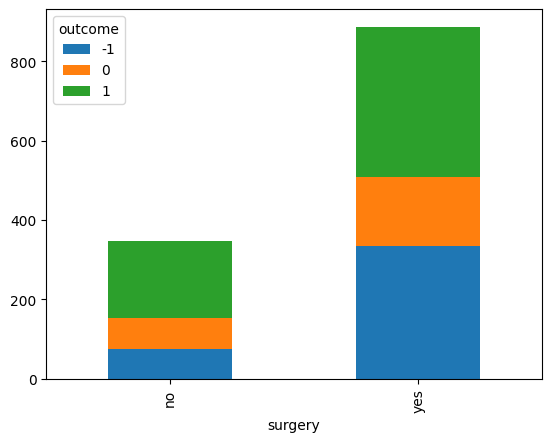

stat=55.361, p=0.000
Significant


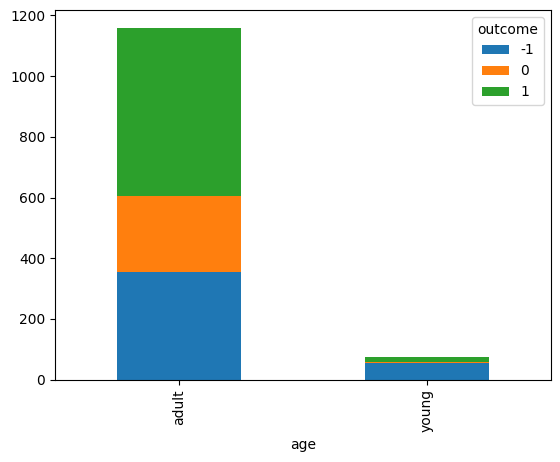

stat=90.212, p=0.000
Significant


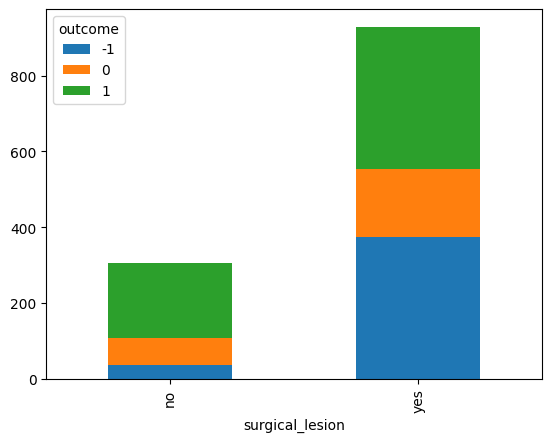

stat=1.538, p=0.463
Not significant


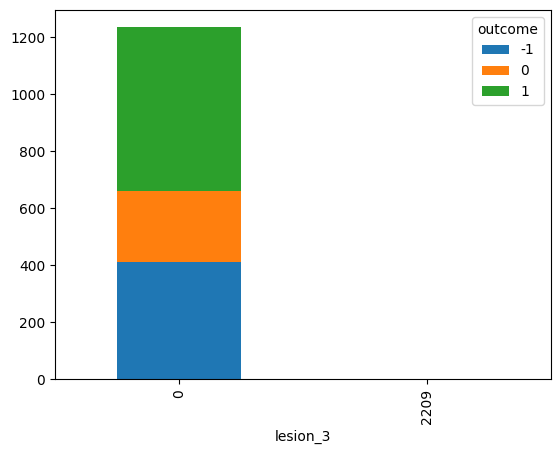

stat=79.910, p=0.000
Significant


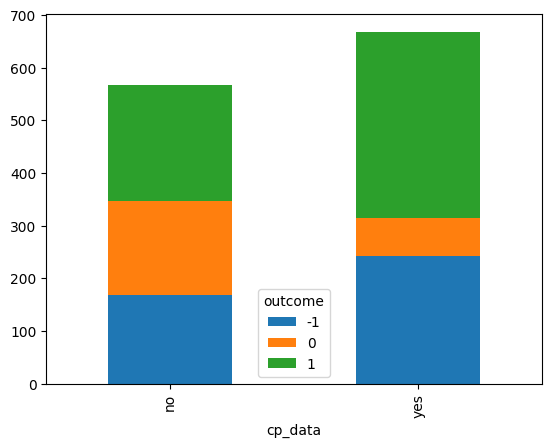

['surgery', 'age', 'surgical_lesion', 'cp_data']

In [525]:
columns = []
significant = []
for i in binary.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])
    stat, p, dof, expected = stats.chi2_contingency(crosstable)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Not significant')
    else:
        print('Significant')
        significant.append(i)

    for b in range(0, 2): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns
significant

stat=138.372, p=0.000
Significant


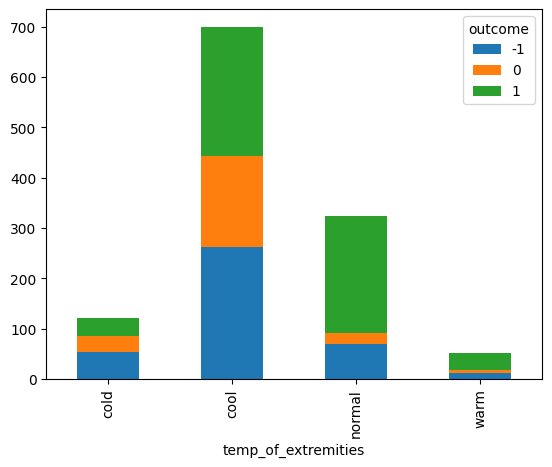

stat=152.700, p=0.000
Significant


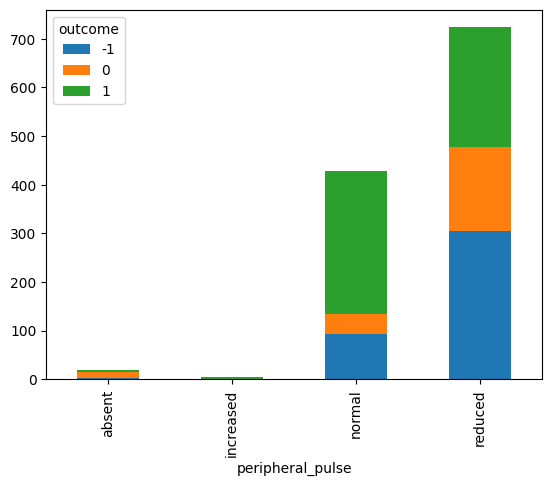

stat=163.831, p=0.000
Significant


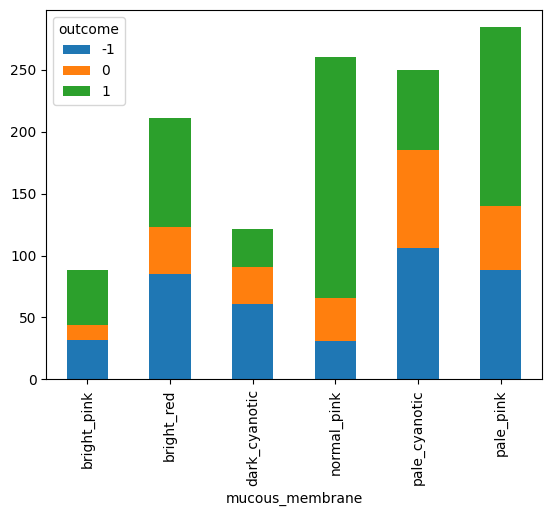

stat=112.127, p=0.000
Significant


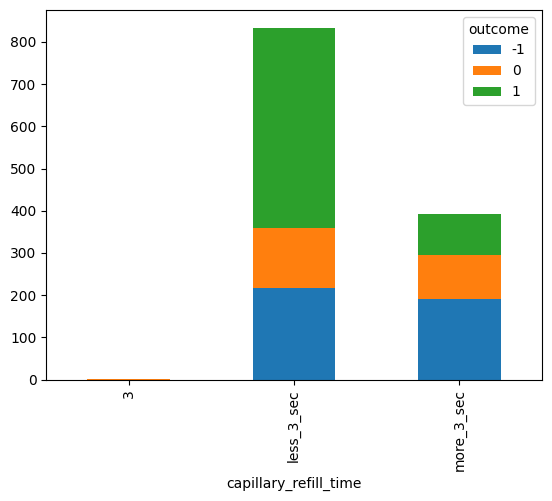

stat=313.950, p=0.000
Significant


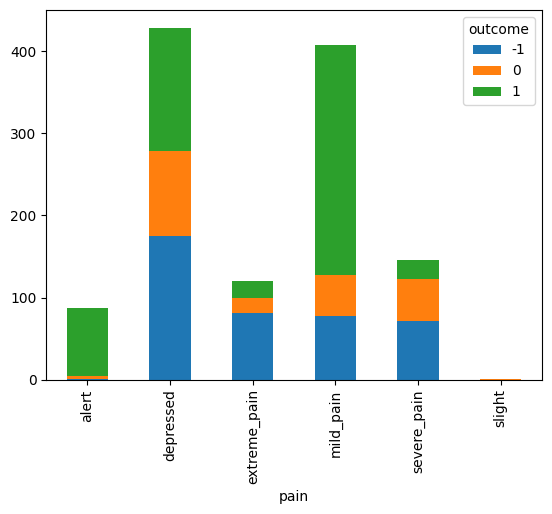

stat=132.402, p=0.000
Significant


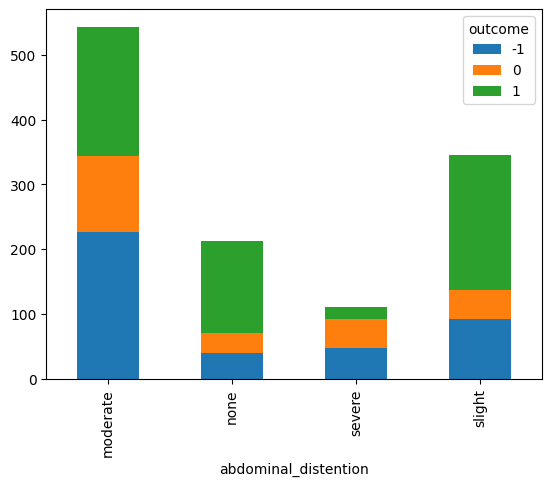

stat=31.321, p=0.000
Significant


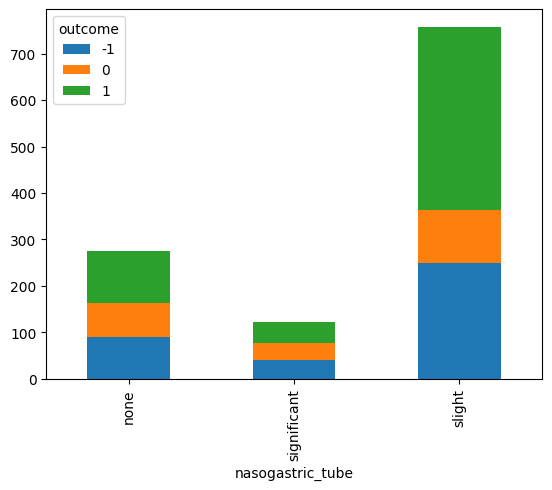

stat=40.321, p=0.000
Significant


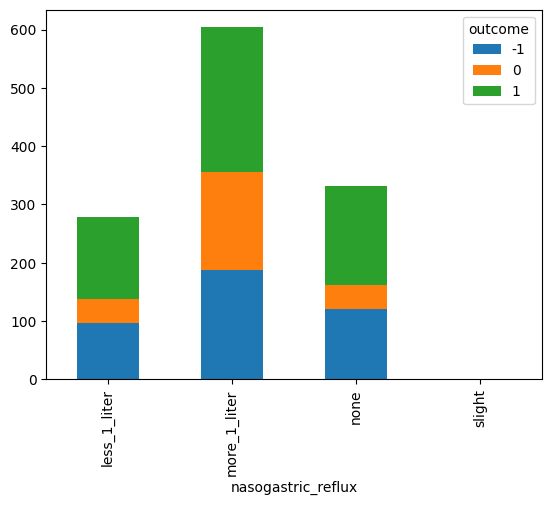

stat=61.710, p=0.000
Significant


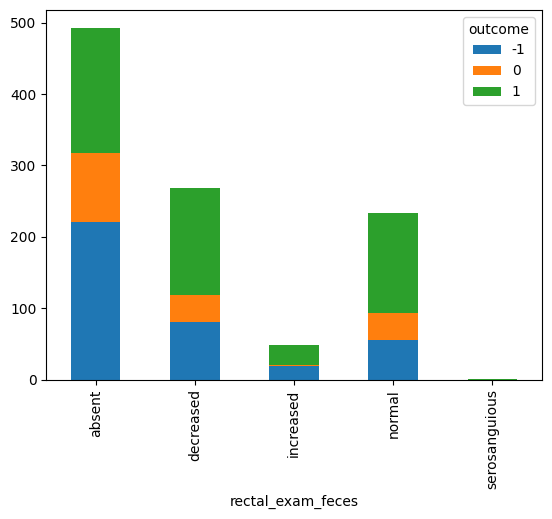

stat=81.911, p=0.000
Significant


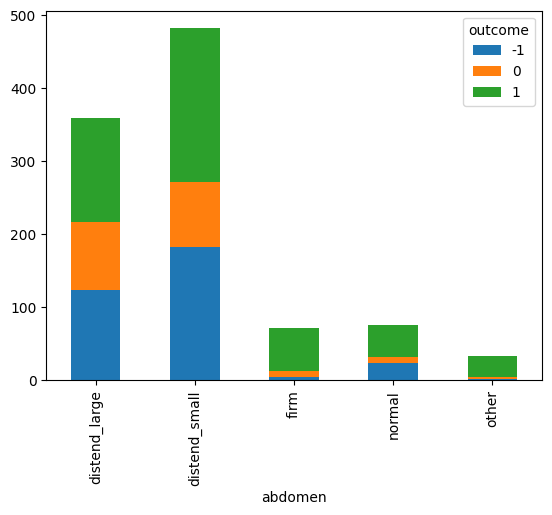

stat=160.995, p=0.000
Significant


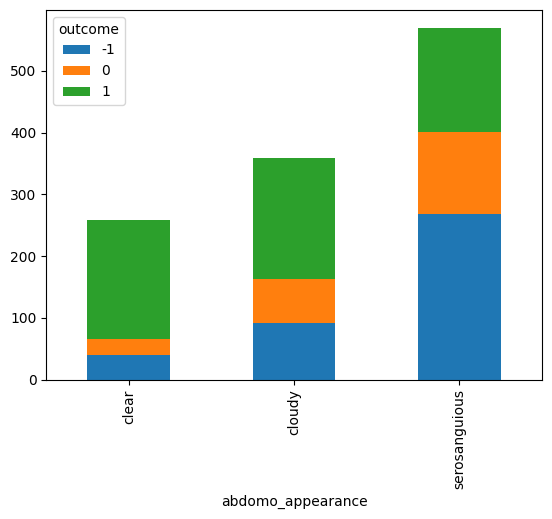

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance']

In [526]:
columns2 = []
significant2 = []
for i in categoric.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])
    stat, p, dof, expected = stats.chi2_contingency(crosstable)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Not significant')
    else:
        print('Significant')
        significant2.append(i)
    
    for b in range(len(crosstable[0])): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns2.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns2
significant2

In [527]:
binary = binary.drop("lesion_3", axis=1)

In [528]:
binary = binary[significant]
categoric = categoric[significant2]

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

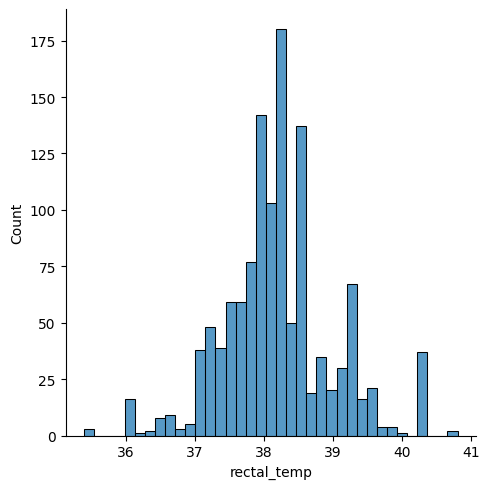

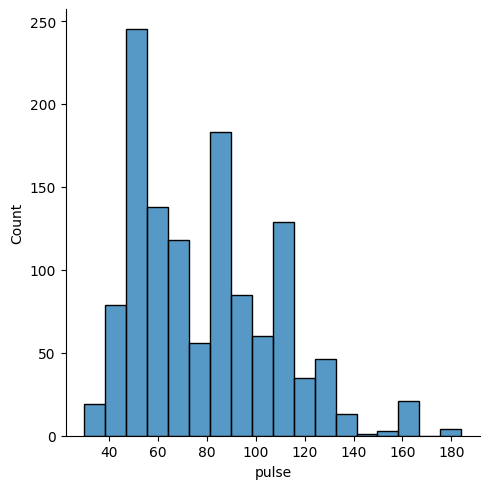

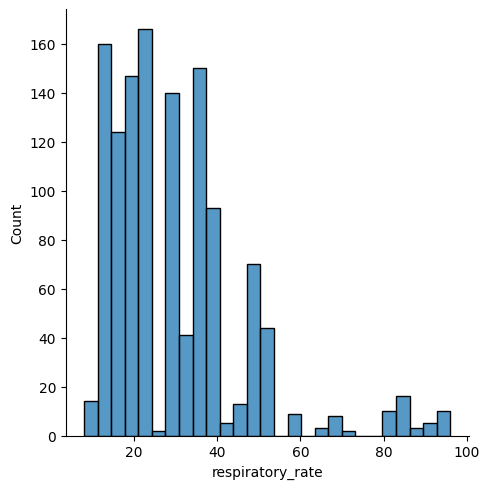

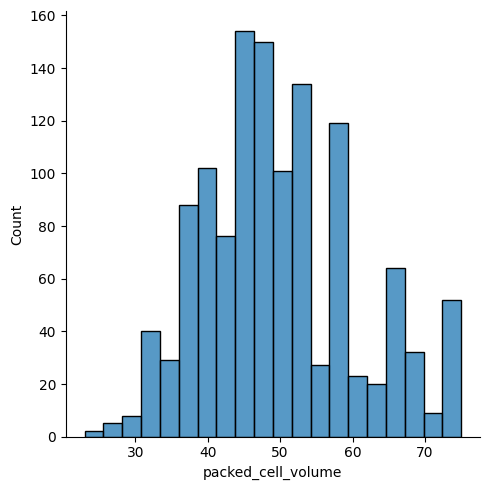

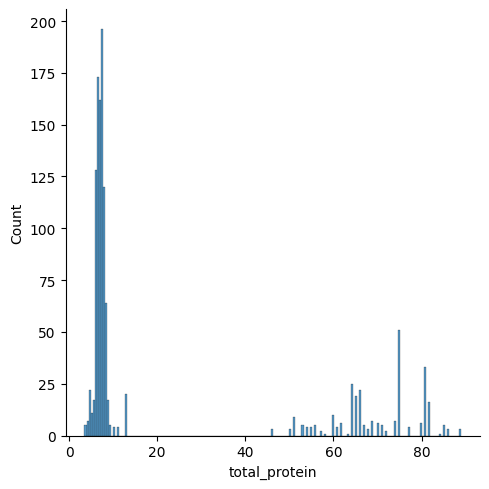

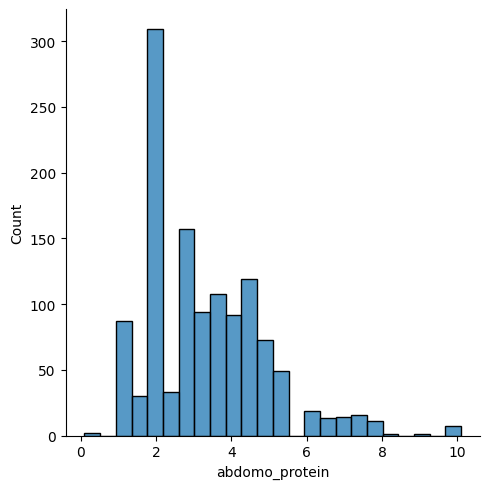

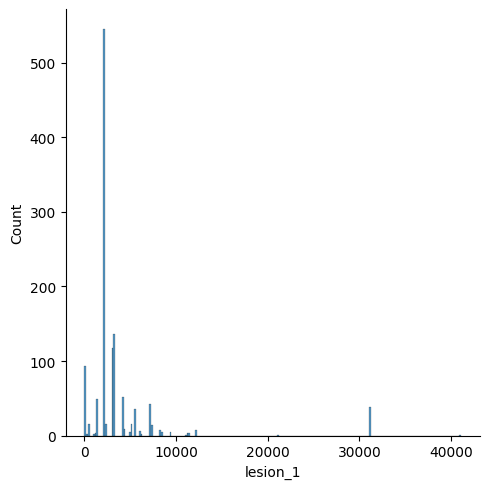

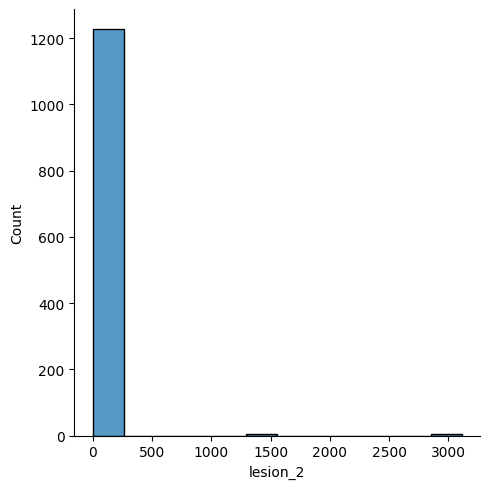

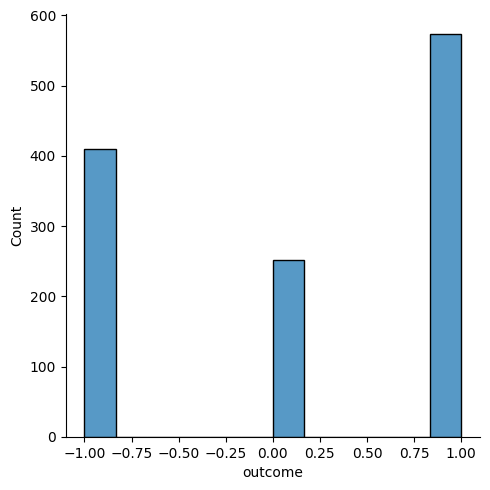

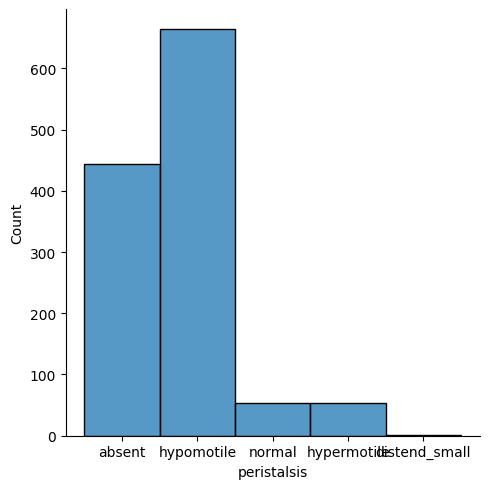

In [529]:
for i in numeric.columns:
    sns.displot(df[i], kind="hist")

In [530]:
binary

,surgery,age,surgical_lesion,cp_data
0,yes,adult,yes,no
1,yes,adult,yes,no
2,yes,adult,yes,no
3,yes,adult,yes,yes
4,no,adult,no,yes
...,...,...,...,...
1230,yes,adult,yes,no
1231,yes,adult,yes,yes
1232,yes,young,yes,yes
1233,yes,adult,yes,no


In [531]:
surgery = {"yes": 1, "no": 0}
age = {"adult": 1, "young":0}
lesion = {"yes": 1, "no": 0}
cp = {"yes": 1, "no": 0}
binary.surgery = binary.surgery.map(surgery)
binary.age = binary.age.map(age)
binary.surgical_lesion = binary.surgical_lesion.map(lesion)
binary.cp_data = binary.cp_data.map(cp)

In [532]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance
0,cool,reduced,dark_cyanotic,more_3_sec,depressed,slight,slight,less_1_liter,decreased,distend_small,serosanguious
1,cool,normal,pale_cyanotic,more_3_sec,mild_pain,moderate,none,more_1_liter,absent,distend_small,serosanguious
2,cool,reduced,pale_pink,less_3_sec,extreme_pain,moderate,slight,none,absent,distend_large,serosanguious
3,cold,reduced,pale_pink,more_3_sec,mild_pain,moderate,slight,more_1_liter,decreased,distend_small,cloudy
4,normal,normal,normal_pink,less_3_sec,alert,none,slight,less_1_liter,normal,normal,cloudy
...,...,...,...,...,...,...,...,...,...,...,...
1230,cool,reduced,pale_pink,more_3_sec,depressed,moderate,none,more_1_liter,absent,distend_large,serosanguious
1231,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,slight,slight,none,decreased,distend_small,serosanguious
1232,normal,reduced,normal_pink,less_3_sec,mild_pain,slight,slight,none,increased,firm,cloudy
1233,normal,reduced,bright_red,less_3_sec,mild_pain,slight,none,more_1_liter,absent,distend_small,cloudy


In [533]:
categoric.rectal_exam_feces.unique()

array(['decreased', 'absent', 'normal', 'increased', 'serosanguious'],
      dtype=object)

In [534]:
ordinal = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]

In [535]:
ordinal = categoric[ordinal]

In [536]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [537]:
ordi = OrdinalEncoder(categories=[['cold','cool','normal', 'warm'], ["absent","reduced", 'normal', 'increased'], [ 'less_3_sec', "3", "more_3_sec"], ['none', 'slight', 'moderate', 'severe'], ['slight', 'none', 'significant'], ['absent', 'normal','decreased','increased', 'serosanguious']])
ordi.fit(ordinal)
ordinal = ordi.transform(ordinal)
ordinal = pd.DataFrame(ordinal)

In [538]:
ordinal.columns = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]
ordinal

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces
0,1.0,1.0,2.0,1.0,0.0,2.0
1,1.0,2.0,2.0,2.0,1.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0
3,0.0,1.0,2.0,2.0,0.0,2.0
4,2.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0
1231,1.0,1.0,0.0,1.0,0.0,2.0
1232,2.0,1.0,0.0,1.0,0.0,3.0
1233,2.0,1.0,0.0,1.0,1.0,0.0


In [539]:
categoric = categoric.drop(["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"], axis=1)

In [540]:
onehot = OneHotEncoder(handle_unknown="ignore")
onehot.fit(categoric)
transformed = onehot.transform(categoric)
transformeddf = pd.DataFrame(transformed.toarray(), columns=onehot.get_feature_names_out(categoric.columns))

In [541]:
encodeddata  = pd.concat([ordinal,transformeddf, binary], axis=1)
encodeddata

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgery,age,surgical_lesion,cp_data
0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
1,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
3,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
4,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
1231,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
1232,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1
1233,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0


In [542]:
finaldf = pd.concat([encodeddata, numeric], axis=1)

In [543]:
finaldf

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,outcome,peristalsis
0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,38.1,132.0,24.0,57.0,8.5,3.4,2209,0,-1,0
1,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,37.5,88.0,12.0,33.0,64.0,2.0,2208,0,0,0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.3,120.0,28.0,37.0,6.4,3.4,5124,0,1,2
3,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,37.1,72.0,30.0,53.0,7.0,3.9,2208,0,1,2
4,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,38.0,52.0,48.0,47.0,7.3,2.6,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,38.5,129.0,48.0,57.0,66.0,2.0,2206,0,1,0
1231,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,37.5,60.0,50.0,35.0,6.4,3.6,2209,0,-1,2
1232,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,37.5,84.0,40.0,40.0,5.9,7.0,400,0,1,2
1233,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,38.1,70.0,16.0,58.0,74.0,2.0,2209,0,1,2


In [544]:
X = finaldf.drop("outcome", axis=1)
y = finaldf.outcome

In [545]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [546]:
rf  =RandomForestClassifier()
rf.fit(X,y)
result = permutation_importance(
    rf, X, y, n_repeats=20, random_state=42, n_jobs=2
)

In [547]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
importances

,nasogastric_reflux_slight,abdomo_appearance_cloudy,abdomen_normal,abdomen_firm,lesion_2,nasogastric_reflux_none,mucous_membrane_bright_pink,mucous_membrane_dark_cyanotic,nasogastric_reflux_less_1_liter,mucous_membrane_pale_cyanotic,...,pain_severe_pain,abdomo_appearance_serosanguious,respiratory_rate,rectal_temp,lesion_1,pain_mild_pain,abdomo_protein,packed_cell_volume,pulse,total_protein
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005668,0.004858,0.005668,0.007287,0.012955,0.017004,0.019433,0.024291,0.025911,0.054251
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.007287,0.007287,0.005668,0.010526,0.011336,0.021053,0.023482,0.035628,0.048583
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003239,0.005668,0.010526,0.007287,0.010526,0.011336,0.016194,0.024291,0.030769,0.045344
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005668,0.004049,0.009717,0.008097,0.008097,0.015385,0.017814,0.028340,0.030769,0.049393
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.004858,0.006478,0.008907,0.008907,0.014575,0.016194,0.024291,0.030769,0.048583
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004049,0.005668,0.007287,0.010526,0.006478,0.009717,0.021053,0.029150,0.031579,0.050202
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005668,0.008097,0.006478,0.008097,0.011336,0.012955,0.017004,0.024291,0.022672,0.057490
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.003239,0.006478,0.006478,0.012955,0.009717,0.017004,0.024291,0.027530,0.051012
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005668,0.008097,0.004858,0.010526,0.010526,0.015385,0.014575,0.025911,0.023482,0.055870
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004858,0.005668,0.006478,0.006478,0.009717,0.013765,0.017004,0.026721,0.029960,0.048583


<Axes: >

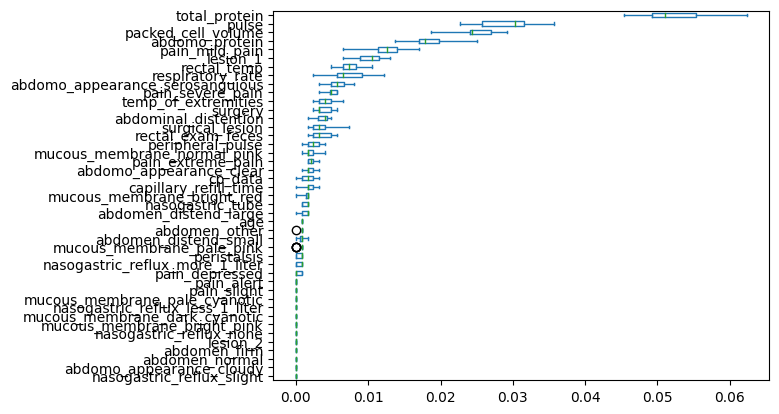

In [548]:
importances.plot.box(vert=False, whis=10)

In [549]:
features = []
for i in importances.columns:
    if importances[i].values.sum() > 0.045:
        features.append(i)
features

['peripheral_pulse',
 'rectal_exam_feces',
 'surgical_lesion',
 'abdominal_distention',
 'surgery',
 'temp_of_extremities',
 'pain_severe_pain',
 'abdomo_appearance_serosanguious',
 'respiratory_rate',
 'rectal_temp',
 'lesion_1',
 'pain_mild_pain',
 'abdomo_protein',
 'packed_cell_volume',
 'pulse',
 'total_protein']

In [550]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

In [ ]:
rand = RandomForestClassifier(random_state=2)

In [ ]:
params = {
    "n_estimators": np.arange(50, 1000, 50),
    "max_depth": [5,10,20,30, 40, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1,2,3,4,5]
}

In [ ]:
grid1 = GridSearchCV(rand, params)
grid1.fit(X_train, y_train)

bestofrand = grid1.best_estimator_
bestofrand

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=150,
                       random_state=2)

In [551]:
rand = RandomForestClassifier(n_estimators=150, min_samples_leaf=2, max_depth=30, random_state=2)
rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)

In [552]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")
print ("Accuracy:", accuracy)
print("f1:", f1)
print("cm:")
print(pd.DataFrame(cm, columns=[-1, 0, 1], index=[-1, 0, 1]))

Accuracy: 0.6699029126213593
f1: 0.6699029126213593
cm:
    -1   0   1
-1  75   5  22
 0  14  33  16
 1  32  13  99


In [ ]:
hist = HistGradientBoostingClassifier(loss="log_loss", random_state=42 , class_weight="balanced")

In [168]:
params ={
    "learning_rate": [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 10, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 20],
}

In [169]:
gridforhist = GridSearchCV(hist, params, verbose=2, n_jobs=10)
gridforhist.fit(X_train, y_train)
bestforhist = gridforhist.best_estimator_
bestforhist

Fitting 5 folds for each of 90 candidates, totalling 450 fits


HistGradientBoostingClassifier(class_weight='balanced', max_depth=3,
                               min_samples_leaf=5, random_state=42)

In [553]:
hist = HistGradientBoostingClassifier(random_state=42, max_depth=3, min_samples_leaf=5)

In [554]:
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "micro")

print("cm:", cm, "acc:", accuracy, "f1:", f1)

cm: [[75  9 18]
 [11 37 15]
 [33 13 98]] acc: 0.6796116504854369 f1: 0.6796116504854369


In [555]:
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\test.csv")
testdf = pd.DataFrame(testdf)
testdf

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [556]:
testdf = testdf.drop(["hospital_number","id"], axis=1)

In [557]:
numeric = []
binary = []
categoric = []
for i in testdf.columns:
    if testdf[i].dtypes == "int64" and testdf[i].nunique() == 2 or testdf[i].dtypes == "float64" and testdf[i].nunique() == 2:
        binary.append(i)
    elif testdf[i].dtypes == "object" and testdf[i].nunique() == 2:
        binary.append(i)
    elif testdf[i].dtypes == "int64" or testdf[i].dtypes == "float64":
        numeric.append(i)
    else: 
        categoric.append(i)

In [558]:
numeric = pd.DataFrame(testdf[numeric])
categoric = pd.DataFrame(testdf[categoric])
binary = pd.DataFrame(testdf[binary])

In [559]:
numeric.isnull().sum()

rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [560]:
categoric.isnull().sum()

temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
rectal_exam_feces        125
abdomen                  154
abdomo_appearance         31
dtype: int64

In [561]:
for i in categoric.columns:
    categoric[i] = categoric[i].fillna(categoric[i].mode()[0])

In [562]:
categoric.isnull().sum()

temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
dtype: int64

In [563]:
binary.isnull().sum()

surgery            0
age                0
surgical_lesion    0
cp_data            0
dtype: int64

In [564]:
peris = {
    "normal": 0,
    "absent": -1,
    "hypomotile": 2,
    "hypermotile": 3, 
    "distend_small": 1
}
categoric.peristalsis = categoric.peristalsis.map(peris)
categoric.peristalsis.unique()

array([ 2, -1,  3,  0], dtype=int64)

In [565]:
numeric = pd.concat([numeric, categoric["peristalsis"]], axis=1)
categoric = categoric.drop("peristalsis", axis=1)

In [566]:
if numeric["nasogastric_reflux_ph"].std() > numeric["total_protein"].std():
    numeric.drop("total_protein", axis=1, inplace=True)
else:
    numeric.drop("nasogastric_reflux_ph", axis=1, inplace=True)

In [567]:
numeric = numeric.drop("lesion_3", axis=1)

In [568]:
binary = binary[significant]
categoric = categoric[significant2]

In [569]:
surgery = {"yes": 1, "no": 0}
age = {"adult": 1, "young":0}
lesion = {"yes": 1, "no": 0}
cp = {"yes": 1, "no": 0}
binary.surgery = binary.surgery.map(surgery)
binary.age = binary.age.map(age)
binary.surgical_lesion = binary.surgical_lesion.map(lesion)
binary.cp_data = binary.cp_data.map(cp)

In [570]:
ordinal = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]

In [571]:
ordinal = categoric[ordinal]

In [572]:
ordinal = ordi.transform(ordinal)
ordinal = pd.DataFrame(ordinal)

In [573]:
ordinal.columns = ["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"]
ordinal

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces
0,2.0,2.0,0.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,0.0,2.0
2,1.0,2.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,3.0,0.0,0.0
4,1.0,2.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0
820,1.0,1.0,2.0,2.0,0.0,0.0
821,1.0,1.0,2.0,2.0,0.0,2.0
822,2.0,2.0,0.0,0.0,0.0,1.0


In [574]:
categoric = categoric.drop(["temp_of_extremities", "peripheral_pulse", "capillary_refill_time", "abdominal_distention", "nasogastric_tube", "rectal_exam_feces"], axis=1)

In [575]:
transformed = onehot.transform(categoric)
transformeddf = pd.DataFrame(transformed.toarray(), columns=onehot.get_feature_names_out(categoric.columns))

In [576]:
encodeddata  = pd.concat([ordinal,transformeddf, binary], axis=1)
encodeddata

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgery,age,surgical_lesion,cp_data
0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
1,1.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
2,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
3,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1
820,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
821,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
822,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1


In [577]:
finaldf = pd.concat([encodeddata, numeric], axis=1)
finaldf

,temp_of_extremities,peripheral_pulse,capillary_refill_time,abdominal_distention,nasogastric_tube,rectal_exam_feces,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,...,cp_data,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,peristalsis
0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,38.6,40.0,20.0,42.0,7.5,2.3,0,0,2
1,1.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,...,1,38.2,112.0,48.0,44.0,6.0,2.6,2208,0,2
2,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,37.7,66.0,12.0,31.5,6.0,1.6,2205,0,2
3,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,37.1,88.0,20.0,75.0,81.0,1.0,1400,0,-1
4,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,1,38.3,50.0,12.0,37.0,6.8,2.6,2208,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,40.3,114.0,36.0,57.0,8.1,4.5,3205,0,2
820,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,37.2,100.0,20.0,50.0,66.0,2.0,2209,0,-1
821,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0,39.2,132.0,12.0,53.0,7.6,4.5,2205,0,2
822,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,38.3,54.0,66.0,49.0,8.6,5.0,3111,0,2


In [578]:
y_pred = hist.predict(finaldf)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ["outcome"]
y_pred

,outcome
0,1
1,-1
2,1
3,0
4,1
...,...
819,0
820,0
821,-1
822,1


In [579]:
backtoback = {
    -1: "died",
    0: "euthanized",
    1: "lived"
}
y_pred.outcome = y_pred.outcome.map(backtoback)

In [580]:
y_pred

,outcome
0,lived
1,died
2,lived
3,euthanized
4,lived
...,...
819,euthanized
820,euthanized
821,died
822,lived


In [581]:
sample = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\data\sample_submission.csv")
sample = pd.DataFrame(sample)
sample = sample.drop("outcome", axis=1)
sample

,id
0,1235
1,1236
2,1237
3,1238
4,1239
...,...
819,2054
820,2055
821,2056
822,2057


In [582]:
submission = pd.concat([sample,y_pred],axis=1)

In [583]:
submission.to_csv("PlaygroundSubmission7.csv", index=False)